In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.integrate import solve_ivp

### Part 1



In [3]:
#constants
G = 6.6743E-11
g0 = 9.81
Me = 5.972E24
Mm = 7.35E22
Re = 6378.1
Rm = 1738.1
ERE = 7.272E-5

In [211]:
#1.1

d = 4000 # depth or distance

def analytical_fall_time(h, g):
    return  np.sqrt(2 * h / g) # also could be (h/(0.5*g))**0.5

t_analytical = analytical_fall_time(d, g0)

print(t_analytical, 'is analytical fall time')

28.55686245854129 is analytical fall time


#1.2 (Makes it easier to understand when in markdown)
$$
d2y/dt2 = -g-a(dy/dt)^Y
$$
$$
d2y/dt2 = -g-a(v^Y)
$$

$$
dv/dt = -g-a*(v^Y) 
$$

unsure if dv/dt = -g but if it is...

$$
-g = -g-a*(v**Y)
$$
$$
0 = -a*(v**Y)
$$

In [220]:
# 1.4
def step3(t, y):
    return [y[1], -g0]  #  velocity, acceleration

y0 = [0, 0]  # initial position, initial velocity

#event works by returng a value and if the value is zero we win
def event(t, y):
    return y[0] + 4E3

    
# + 3 so it doesnt stop immediatley
sltn = solve_ivp(step3, [0, t_analytical+3], y0, t_eval=np.linspace(0, t_analytical+3, 100), events=[event])

# answers
#made position negative so it looks like its falling
time = sltn.t
position = sltn.y[0]  #negative or positive? both work but only one is probably correct
velocity = sltn.y[1]

print(sltn)
print('when time is at 2.856E1')
print('The difference between 28.556 and 28.56 is nothing as it is just rounded up. Therefore both show the correct answer')

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  3.188e-01 ...  3.124e+01  3.156e+01]
        y: [[ 0.000e+00 -4.984e-01 ... -4.786e+03 -4.885e+03]
            [ 0.000e+00 -3.127e+00 ... -3.064e+02 -3.096e+02]]
      sol: None
 t_events: [array([ 2.856e+01])]
 y_events: [array([[-4.000e+03, -2.801e+02]])]
     nfev: 44
     njev: 0
      nlu: 0
when time is at 2.856E1
The difference between 28.556 and 28.56 is nothing as it is just rounded up. Therefore both show the correct answer


Text(0.5, 1.0, 'Figure 1')

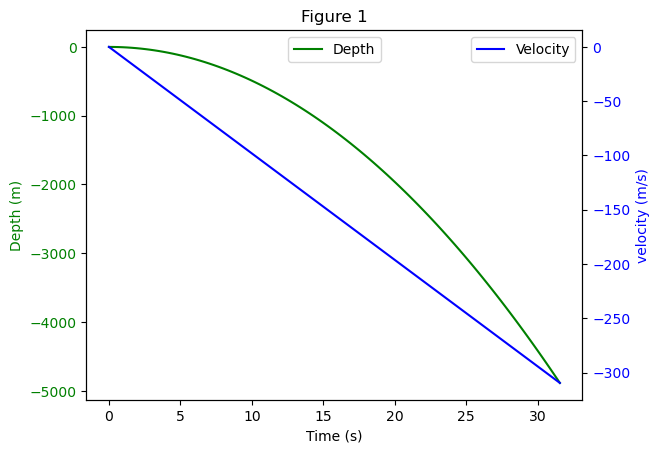

In [222]:
# 1.3

# plotting
fig, ax1 = plt.subplots()
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Depth (m)", color='green')
ax1.plot(time, position, 'green', label="Depth")
ax1.tick_params(axis='y', labelcolor='green')

ax2 = ax1.twinx()
ax2.set_ylabel("velocity (m/s)", color='blue')
ax2.plot(time, velocity, 'blue', label="Velocity")
ax2.tick_params(axis='y', labelcolor='blue')

ax1.legend(loc = 9)
ax2.legend(loc = 0)
ax1.set_title("Figure 1")

### Part 2

36.06003601991255 36.06 look the same


Text(0.5, 1.0, 'Figure 2')

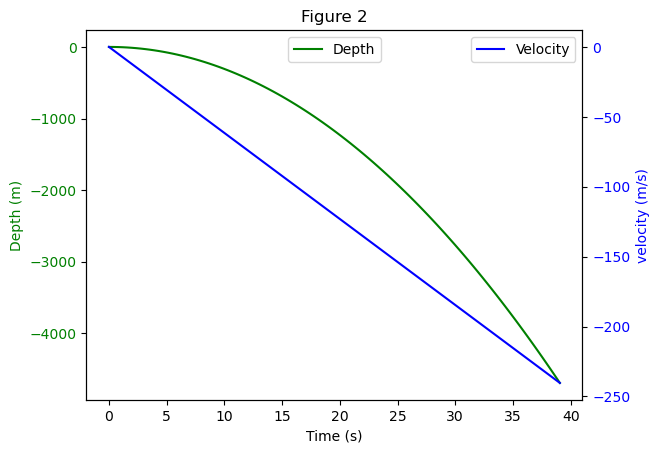

In [223]:
# 2.1

def analytical_fall_time_updated(h):
    return  np.sqrt(2 * h / (g0*(h/Re))) # also could be (h/(0.5*g))**0.5

#time answer
t_analytical2 = analytical_fall_time_updated(d)

def step4(t,y):
    return [y[1], -(g0*(d/Re))]
    
sltn2 = solve_ivp(step4, [0, t_analytical2+3], y0, t_eval=np.linspace(0, t_analytical2+3, 100), events=[event])

time2 = sltn2.t
position2 = sltn2.y[0]  #negative or positive? both work but only one is probably correct
velocity2 = sltn2.y[1]

print(t_analytical2, 3.606e+01, 'look the same')

fig, ax1 = plt.subplots()
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Depth (m)", color='green')
ax1.plot(time2, position2, 'green', label="Depth")
ax1.tick_params(axis='y', labelcolor='green')

ax2 = ax1.twinx()
ax2.set_ylabel("velocity (m/s)", color='blue')
ax2.plot(time2, velocity2, 'blue', label="Velocity")
ax2.tick_params(axis='y', labelcolor='blue')

ax1.legend(loc = 9)
ax2.legend(loc = 0)
ax1.set_title("Figure 2")